In [259]:
import os 
import json
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
import os
os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\Loan Prediction')
data = pd.read_csv('LoanTrain.csv')

#### Listing the columns persent in the dataset

In [206]:
list(data.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [207]:
data.shape[0]

614

In [208]:
len(data['Loan_ID'].unique())

614

In [209]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
## Verifying the Constant Fields

In [210]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Handling the Missing Values

In [211]:
data.loc[data['Gender'].isnull(),'Gender']='Trasgender'
data.loc[data['Dependents'].isnull(),'Dependents']='0'
data.loc[data['Married'].isnull(),'Married']='No'
data.loc[data['Self_Employed'].isnull(),'Self_Employed']='No'
data=data.drop(index=data.loc[data['LoanAmount'].isnull(),:].index)
data.loc[data['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=0
data.loc[data['Credit_History'].isnull(),'Credit_History']=0

In [212]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [213]:
Numeric_columns=data.select_dtypes(include=['int64','float64'])
categorical_columns=data.select_dtypes(include=['object'])
print(Numeric_columns.columns)
print(categorical_columns.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


#### Constant Values in Numeric Columns

In [214]:
from sklearn.feature_selection import VarianceThreshold

#Using a Built In Function
sel = VarianceThreshold(threshold=0)
sel.fit(Numeric_columns)  # fit finds the features with zero variance
print('Total # of non constant features',sum(sel.get_support()))
sel.transform(Numeric_columns)
Nonconstant_Numeric=Numeric_columns.loc[:,list(sel.get_support())]
#Nonconstant_Numeric

##Generic Way
#constant_numeric_features=[i for i in Numeric_columns.columns if Numeric_columns[i].std()==0]
#constant_numeric_features

Total # of non constant features 5


#### Constant Values in Categorical Columns

In [215]:
unique_columns=[]
for i in categorical_columns.columns:
    if len(categorical_columns[i].unique())==1:
        unique_columns.append(i)
print(unique_columns)

[]


#### Merging the two dataframes

In [248]:
new_df=pd.concat([categorical_columns,Nonconstant_Numeric],axis=1)
new_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [249]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y,5417,4196.0,267.0,360.0,1.0


#### Removing the unique key columns

In [250]:
unique_columns=[i for i in new_df.columns if len(new_df[i].unique())==new_df.shape[0]]
print(unique_columns)

['Loan_ID']


#### Dropping the unique key columns

In [251]:
new_df=new_df.drop(unique_columns,axis=1)

#### Univariate Analysis

Plot for:  Gender


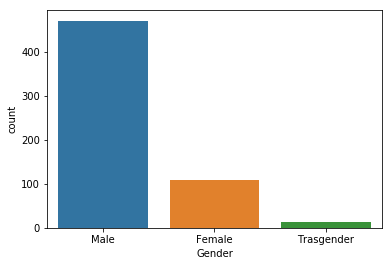

Plot for:  Married


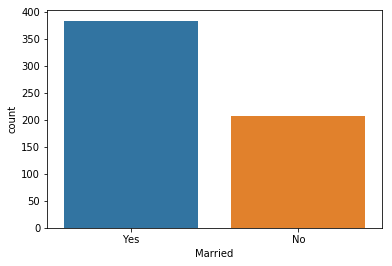

Plot for:  Dependents


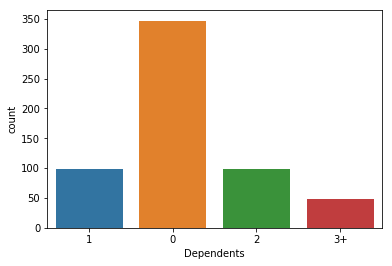

Plot for:  Education


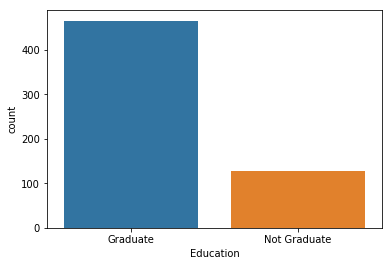

Plot for:  Self_Employed


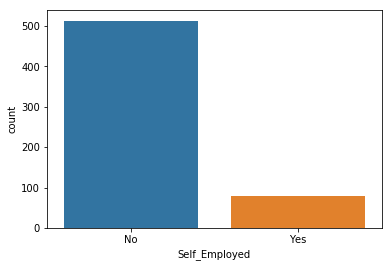

Plot for:  Property_Area


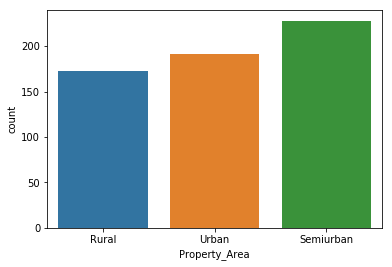

Plot for:  Loan_Status


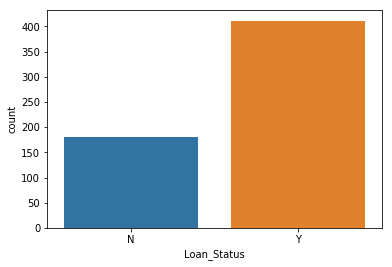

In [261]:
for feat in new_df.select_dtypes(include=['object']).columns:
    print('Plot for: ',feat)
    sns.countplot(new_df[feat])
    plt.show()

Plot for:  Gender  vs Loan Status


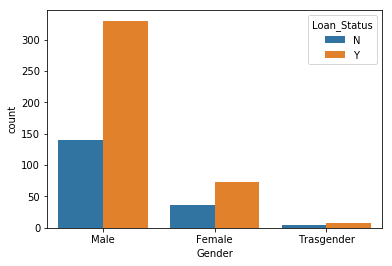

Plot for:  Married  vs Loan Status


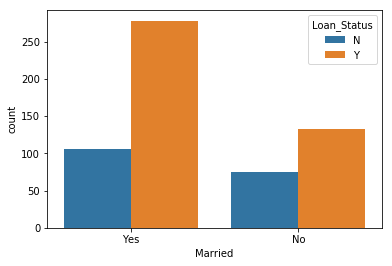

Plot for:  Dependents  vs Loan Status


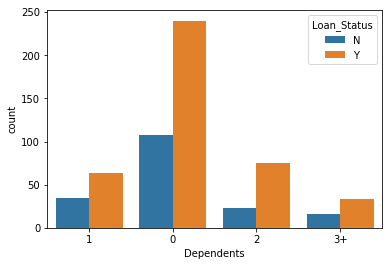

Plot for:  Education  vs Loan Status


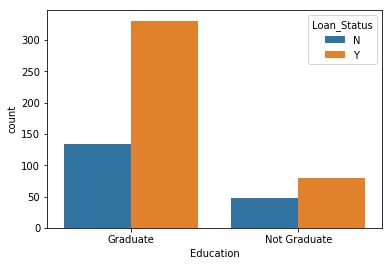

Plot for:  Self_Employed  vs Loan Status


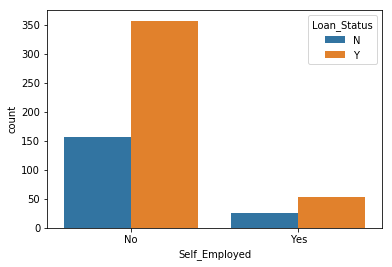

Plot for:  Property_Area  vs Loan Status


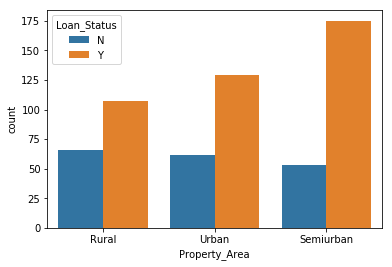

Plot for:  Loan_Status  vs Loan Status


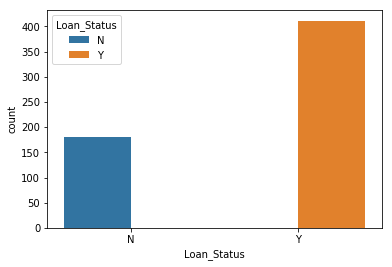

In [263]:
for feat in new_df.select_dtypes(include=['object']).columns:
    print('Plot for: ',feat,' vs Loan Status')
    sns.countplot(new_df[feat],hue=new_df['Loan_Status'])
    plt.show()

In [ ]:
## Unmarried ppl are more likely to get a loan, hence considering the "Married column" for future analysis
## Persons with zero or 1 dependents are more likely to get a loan, hence considering "Dependents column" for future analysis
## Graduate

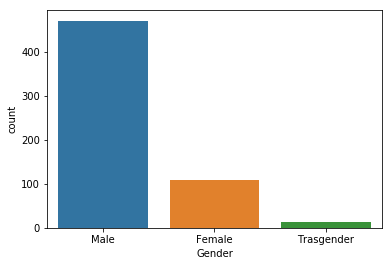

In [238]:
import seaborn as sns
sns.countplot(new_df['Gender'])